In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0105/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 485 ms, sys: 23.7 ms, total: 508 ms
Wall time: 511 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.010814,0.0,-0.010528,0.0,-0.007839,4.042582e-03,-0.015733,4.042582e-03,0.208810,...,0.0,0.003892,0.0,0.002779,0.0,-0.033904,0.0,-0.018464,0.0,0.001312
1,0.0,-0.006430,0.0,0.012639,0.0,-0.001413,0.000000e+00,-0.013234,1.256398e-06,0.178798,...,0.0,-0.013009,0.0,-0.002402,0.0,-0.011110,0.0,-0.027494,0.0,-0.003227
2,0.0,-0.005055,0.0,0.009427,0.0,-0.004568,0.000000e+00,0.010436,2.405004e-05,0.171103,...,0.0,-0.001201,0.0,-0.002927,0.0,-0.041272,0.0,-0.008074,0.0,-0.005275
3,0.0,0.001632,0.0,0.025446,0.0,0.001462,7.707083e-08,0.008084,4.103336e-07,0.114497,...,0.0,-0.005206,0.0,-0.001036,0.0,-0.024987,0.0,-0.001255,0.0,-0.003272
4,0.0,-0.000513,0.0,0.007844,0.0,-0.001300,1.763056e-02,-0.027426,4.753948e-03,0.097177,...,0.0,0.006543,0.0,0.006006,0.0,-0.015281,0.0,-0.016180,0.0,-0.003769


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,4.042582e-03,4.042582e-03,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,1.256398e-06,0.008003,0.000066,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,2.405004e-05,0.000006,0.000000,0.000000,0.0,0.0,...,0.000232,0.000442,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,7.707083e-08,4.103336e-07,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,2.825606e-07,2.048439e-07,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.763056e-02,4.753948e-03,0.000053,0.293578,0.002784,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,4.050764e-03,4.050764e-03,0.000000e+00,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,1.256399e-06,8.034638e-03,0.000066,0.000000,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,2.405033e-05,6.443295e-06,0.000000,0.000000,0.0,0.0,...,0.000232,4.419209e-04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,7.707083e-08,4.103337e-07,0.000000e+00,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000e+00,2.825606e-07,2.048439e-07,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.778690e-02,4.765266e-03,5.335709e-05,0.341217,0.002787,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,3.669061e-05,6.370256e-04,3.337987e-09,0.000000,0.000000,0.0,0.0,...,0.000000,6.270229e-11,1.196620e-05,6.892144e-07,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    40.000001
1    46.002743
2    58.000696
3    41.000032
4    41.001190
5    36.000022
6    23.000001
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 174 ms, sys: 31.7 ms, total: 206 ms
Wall time: 206 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.01052178, -0.00630669, -0.00499229,  0.00168479, -0.00047783,
        0.00504848, -0.00027529], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    30.833401
1    34.944492
2    39.341709
3    28.985672
4    25.850590
5    36.309113
6    30.232094
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0105_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0105_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0105_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000001,30.833401
1,46.002743,34.944492
2,58.000696,39.341709
3,41.000032,28.985672
4,41.001190,25.850590
5,36.000022,36.309113
6,23.000001,30.232094


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.836707502394553

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

10.512854613470312

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.5132887339454644, pvalue=0.23871292510545083)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-0.4781913305153256

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 246 ms, sys: 69 ms, total: 315 ms
Wall time: 316 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.00431897,  0.00440305,  0.00933492, ...,  0.00532007,
         0.00330046,  0.00548178],
       [-0.00053139,  0.00637439,  0.00805876, ...,  0.007909  ,
         0.00331244,  0.00275004],
       [-0.00153272,  0.00652966,  0.00821795, ...,  0.00727592,
         0.00199293,  0.00493535],
       ...,
       [-0.00420417, -0.0017813 , -0.00592716, ...,  0.00104704,
         0.00660534,  0.00130177],
       [-0.00578846, -0.00113516, -0.00058661, ...,  0.00303571,
         0.00776657,  0.00148794],
       [-0.00517192, -0.00248483, -0.00452197, ...,  0.00168893,
         0.00908124, -0.00088514]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[-0.00431897,  0.00440305,  0.00933492, ...,  0.00532007,
         0.00330046,  0.00548178],
       [-0.00053139,  0.00637439,  0.00805876, ...,  0.007909  ,
         0.00331244,  0.00275004],
       [-0.00153272,  0.00652966,  0.00821795, ...,  0.00727592,
         0.00199293,  0.00493535],
       ...,
       [-0.00420417, -0.0017813 , -0.00592716, ...,  0.00104704,
         0.00660534,  0.00130177],
       [-0.00578846, -0.00113516, -0.00058661, ...,  0.00303571,
         0.00776657,  0.00148794],
       [-0.00517192, -0.00248483, -0.00452197, ...,  0.00168893,
         0.00908124, -0.00088514]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[44.170654, 39.678123, 48.11239 , ..., 28.451134, 35.274914,
        27.339083],
       [33.523037, 34.56707 , 38.751637, ..., 23.665802, 41.075676,
        38.95579 ],
       [40.35662 , 38.852783, 47.883266, ..., 34.50863 , 43.588375,
        35.49332 ],
       ...,
       [32.885567, 40.397434, 45.113934, ..., 39.140736, 51.771557,
        49.625122],
       [31.02131 , 39.113182, 60.1401  , ..., 46.642708, 51.53116 ,
        37.729332],
       [33.42678 , 48.22417 , 60.25452 , ..., 48.794113, 56.03099 ,
        52.577465]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[44.170654, 39.678123, 48.11239 , ..., 28.451134, 35.274914,
        27.339083],
       [33.523037, 34.56707 , 38.751637, ..., 23.665802, 41.075676,
        38.95579 ],
       [40.35662 , 38.852783, 47.883266, ..., 34.50863 , 43.588375,
        35.49332 ],
       ...,
       [32.885567, 40.397434, 45.113934, ..., 39.140736, 51.771557,
        49.625122],
       [31.02131 , 39.113182, 60.1401  , ..., 46.642708, 51.53116 ,
        37.729332],
       [33.42678 , 48.22417 , 60.25452 , ..., 48.794113, 56.03099 ,
        52.577465]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[15.68711705],
       [19.80627031],
       [22.02838235],
       [10.37271724],
       [ 8.23032389],
       [18.99818811],
       [13.97000048]])

In [63]:
ui_train

array([[47.21639338],
       [50.67909918],
       [56.67850208],
       [46.91968861],
       [44.5223052 ],
       [54.79924412],
       [48.69555779]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

34.34539870194026

In [67]:
y_traina = block_0105_true_and_forecasted_values_df[["True_count"]].values

In [68]:
y_traina

array([[40.0000012 ],
       [46.00274337],
       [58.00069632],
       [41.00003184],
       [41.00118972],
       [36.0000218 ],
       [23.00000075]])

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.8571428571428571

In [71]:
np.mean(output, axis = 0)

array([30.833414, 34.94449 , 39.341736, 28.985695, 25.850586, 36.30911 ,
       30.232117], dtype=float32)

In [72]:
sum_forecasted_values

0    30.833401
1    34.944492
2    39.341709
3    28.985672
4    25.850590
5    36.309113
6    30.232094
dtype: float32

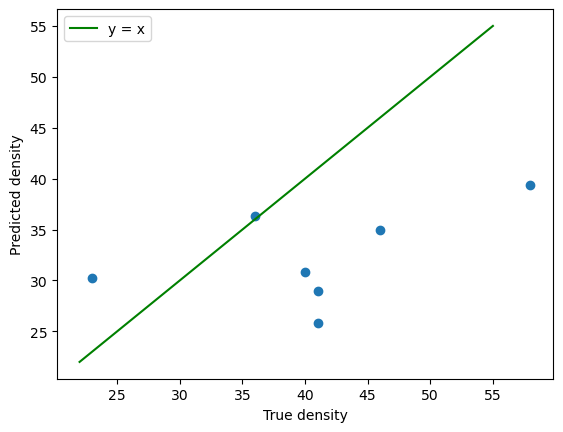

In [73]:
plt.scatter(block_0105_true_and_forecasted_values_df['True_count'], block_0105_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 55], [22, 55], color='green', label='y = x')
plt.legend()
plt.show()

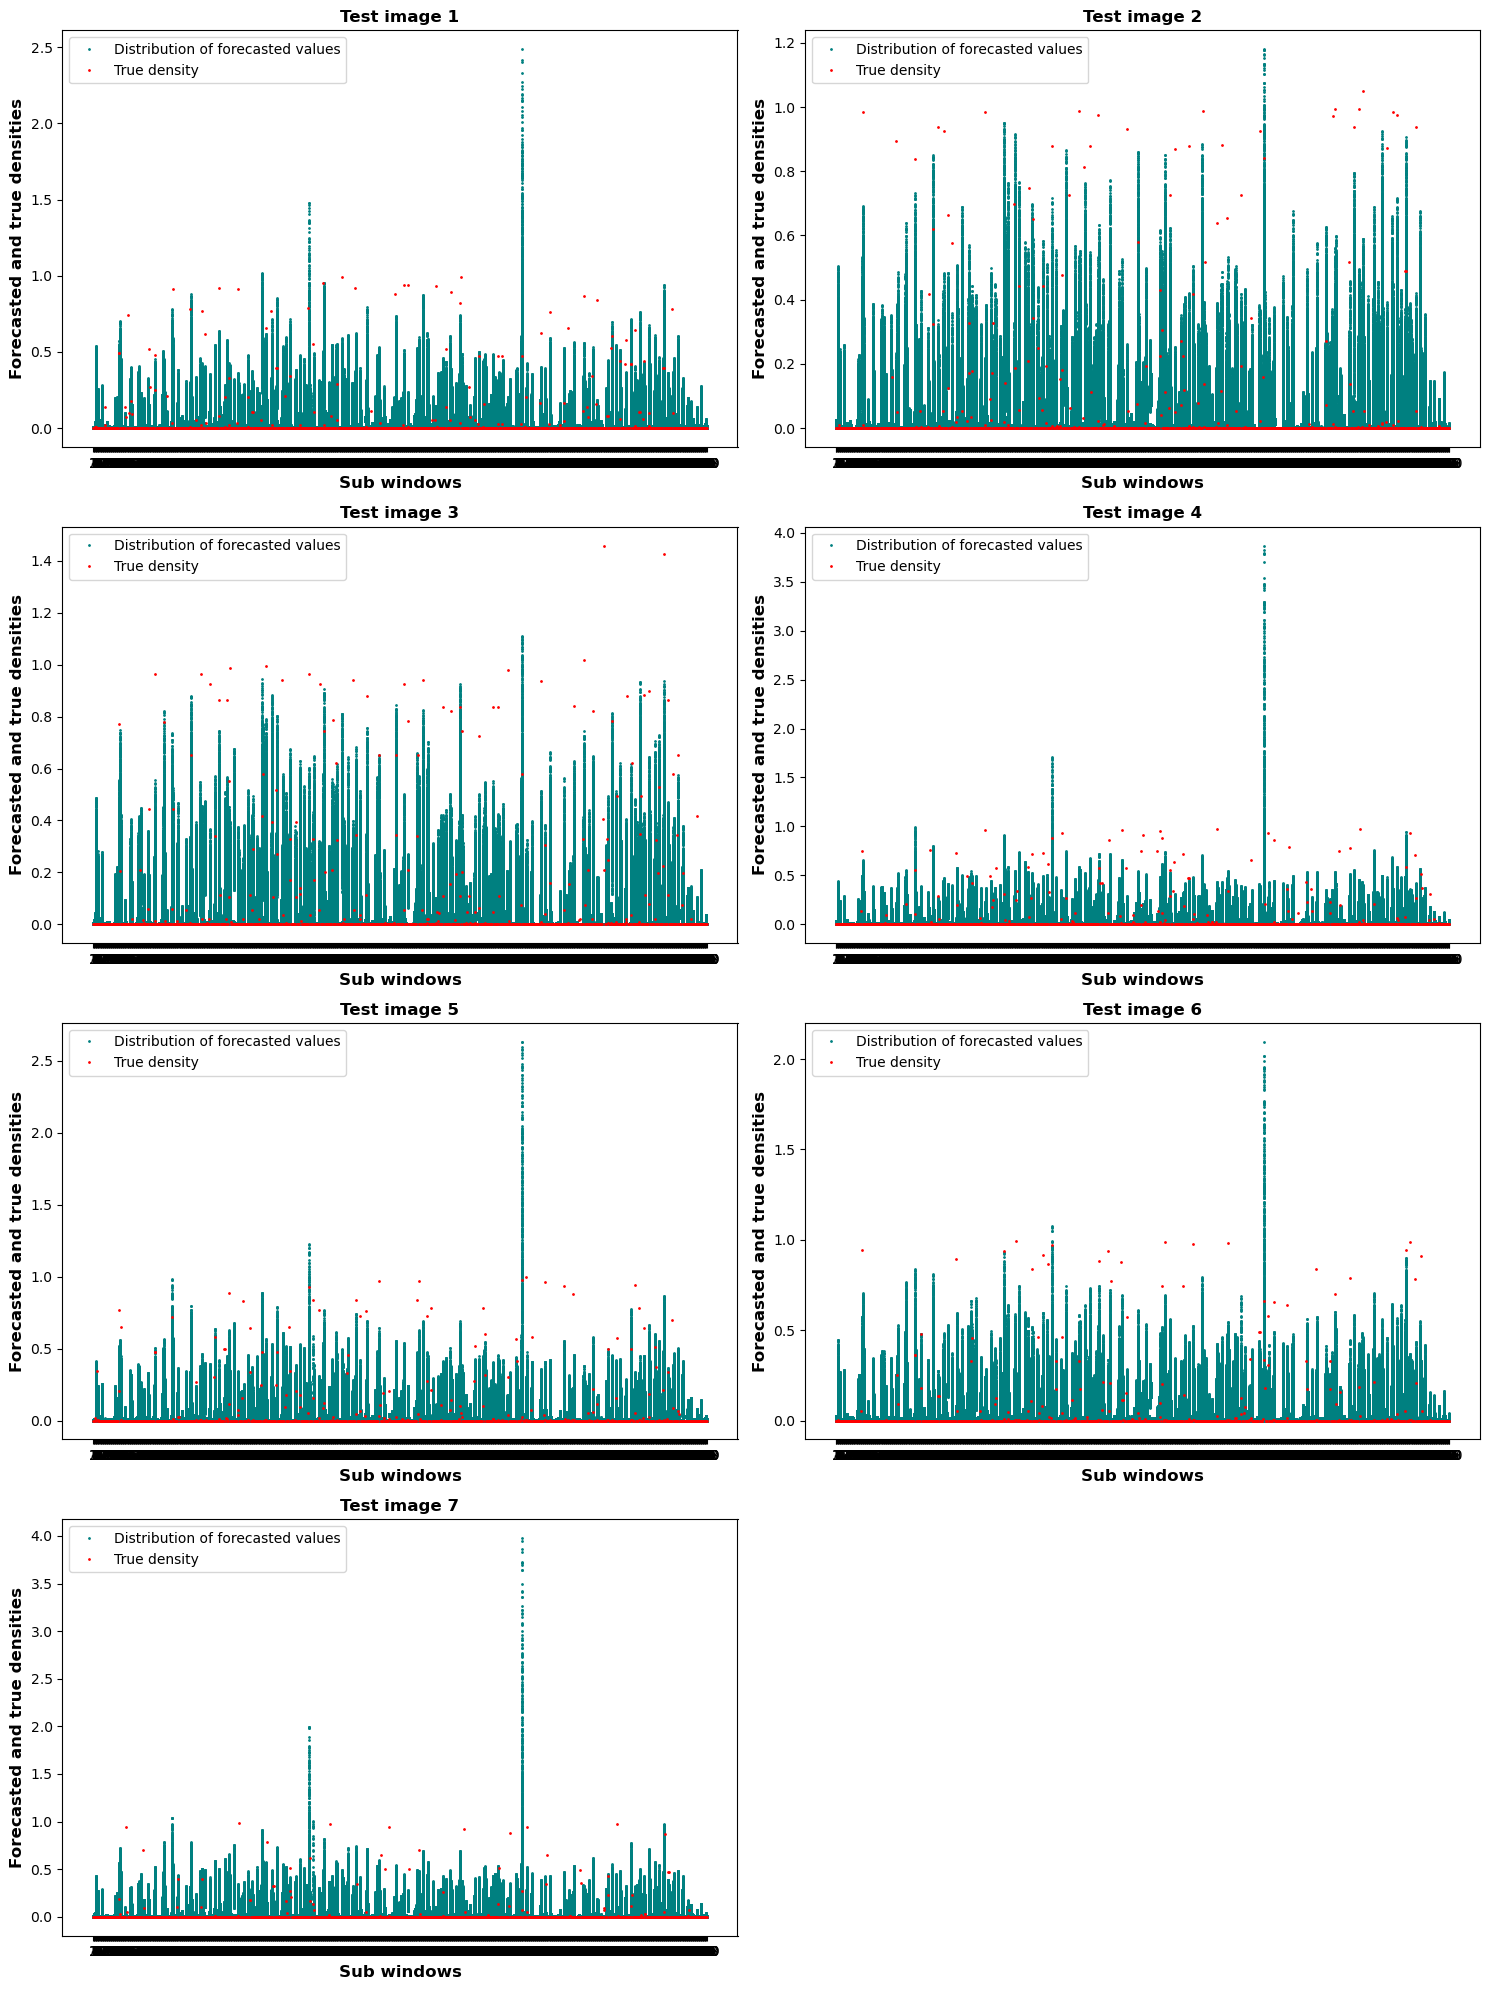

CPU times: user 29.9 s, sys: 703 ms, total: 30.7 s
Wall time: 30.3 s


In [74]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [75]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [76]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 